# Taller de Investigación
## Trabajando con la simulación semianalitica mini

La idea inicial, lectura de archivos, calculo de distrancia entre halos e identificación de las caracteristicas del ambiente. 

In [27]:
import numpy as np
import h5py                                      #que pasa con hdf5? 
from collections import Counter
import matplotlib.pyplot as plt

### Lectura de archivos
Primero la lectura de datos: A continuación solo llama columnas de ID, X, Y, Z (trabajo con la pato)

In [28]:
datos = np.genfromtxt("DATA/sussing_125.z0.000.AHF_halos", usecols=[0,5,6,7], names=True)
#datos

Clase de lectura de archivos, donde se requieren las columnas iniciales de interes de los archis, se lee el tipo hdf5 y se guarda la información asociada a un halo en particular. 

In [29]:
class read_file: 
    
    def __init__(self, path, file, columns=None):
        if columns is not None:
            self.cols = columns
            #self.hostcol = self.cols[1]; self.Numcol = self.cols[2]; self.Mcol = self.cols[3]; 
        else:
            self.cols     = [0, 1, 2, 3, 5, 6, 7] #ID, hosthalo, substructuras, masa y posiciones xyz
            
        self.path = path; self.file = file; self.read()
        
    def read(self):
        if self.file == "*.hdf5":
            print("No se ha hecho esta parte")
        else:
            data = np.genfromtxt(str(self.path+self.file), usecols = self.cols, names=True)
            self.data = np.array([list(row) for row in data])
            
    def halo_info(self, index, info=False): 
        self.hinfo = self.data[index]
        #self.hostcol  = self.cols[1]; self.Numcol = self.cols[2]; self.Mcol = self.cols[3]; 
        return(self.hinfo)

Ejemplo de lectura de archivos

In [30]:
sussing_125 = read_file("DATA/", "sussing_125.z0.000.AHF_halos")
#sussing_125.halo_info(10)[4:]

Ahora se realizan calculos de distancia y velocidades. 

In [31]:
class kinetic:                                   #cinematica entre dos halos
    
    def __init__(self, halo1, halo2):            #halo1 y halo22 son objetos de read_file (halo_info)  
        self.halo1 = halo1; self.halo2 = halo2     
    
    #def positions(self, halo1, halo2):          #positions cols: lista correspondiente a las columnas x, y, z.
        #X = halo[4]; Y = halo[5]; Z = halo[6] 
        #self.position = np.array([X,Y,Z])
        #return(self.position)

    def distance(self): 
        posA = self.halo1[4:]; posB = self.halo2[4:]
        return(np.linalg.norm(posA-posB))
    
    #def velocity(self, , halo2): 
        #return(np.linalg.norm(halo1-halo2))

In [32]:
distancia = kinetic(sussing_125.halo_info(15), sussing_125.halo_info(20))#.distance()
distancia.distance()

1519.0730809620231

### Tarea I: gráfica de halos vs masa

In [33]:
datos = sussing_125.data[sussing_125.data[:,1] == 0] 
#datos[:,2]

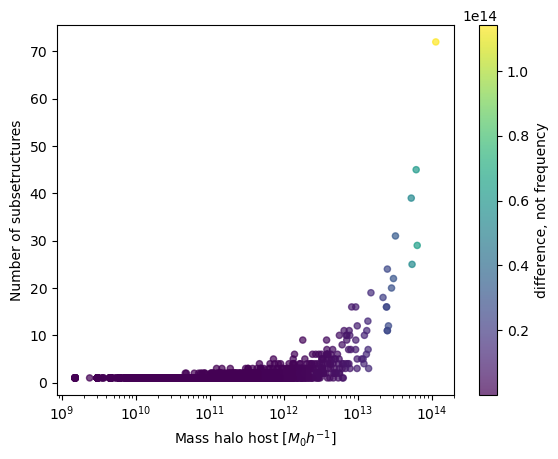

In [50]:
dis = np.sqrt(datos[:,3]**2 + datos[:,2]**2)

fig, ax = plt.subplots()

plt.xscale('log')
ax.set_xlabel(r'Mass halo host [$M_{0}h^{-1}$]')
ax.set_ylabel("Number of subsetructures")

scatter = ax.scatter(datos[:,3], datos[:,2], c=dis, s=20, alpha=0.7)

# Agrega una barra de color al objeto de ejes
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('difference, not frequency')

plt.show()